# Tutorial for analyzing instrumental learning data with the HDDMnnRL module

In [1]:
import hddm
import pickle
import pandas as pd

#### Load the data

In [2]:
with open('./angle_d1_c3_s20_t500.pickle', 'rb') as handle:
    datafile = pickle.load(handle)

# Here, datafile is saved as a list of datasets. We pick the first dataset.
dataset = datafile[0]

In [3]:
# Reformat the dataset as a dataframe
data = hddm.utils.get_dataset_as_dataframe_rlssm(dataset)

#### Initialize the HDDMnnRL model and sample

In [ ]:
# Specify number of samples and burnins
nsamples = 100
nburn = 50

In [ ]:
m = hddm.HDDMnnRL(data, model='angle', rl_rule='RWupdate', non_centered=True, include=['z', 'theta', 'rl_alpha'], p_outlier = 0.0)
m.sample(nsamples, burn=nburn, dbname='traces.db', db='pickle')

#### Save the model

In [ ]:
# Save the model
m.save('rlssm_model')

In [ ]:
# Load the model
model = hddm.load('rlssm_model')

#### Check the posterior results

In [ ]:
m.plot_posteriors()

In [4]:
# Load the trace
with open('./traces.db', 'rb') as handle:
    tracefile = pickle.load(handle)

In [5]:
# Re-format traces as a dataframe
traces = hddm.utils.get_traces_rlssm(tracefile)

In [6]:
model_ssm = 'angle'
model_rl = 'RWupdate'

config_ssm = hddm.model_config.model_config[model_ssm]
config_rl = hddm.model_config_rl.model_config_rl[model_rl]

In [ ]:
_ = hddm.plotting.plot_posterior_pairs_rlssm(tracefile, config_ssm['params'] + config_rl['params'])

#### Posterior Predictive Checks

In [7]:
num_posterior_samples = 3
p_lower = {0: 0.15, 1:0.30, 2:0.45}
p_upper = {0: 0.85, 1:0.70, 2:0.55}
ppc_sdata = hddm.plotting.gen_ppc_rlssm(model_ssm, config_ssm, model_rl, config_rl, data, traces, num_posterior_samples, p_lower, p_upper, save_data=True, save_name='ppc_data')

100%|██████████| 3/3 [04:29<00:00, 89.79s/it]


ppc data saved at ./ppc_data.csv


In [ ]:
# Load the saved ppc data
# ppc_sdata = pd.read_csv('./ppc_data.csv')

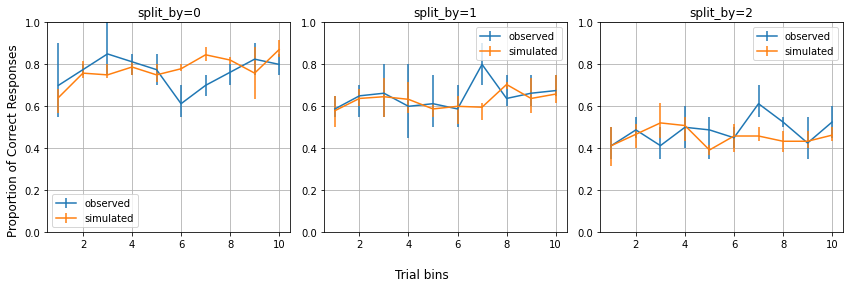

In [8]:
_ = hddm.plotting.plot_ppc_choice_rlssm(data, ppc_sdata, 40, 10)

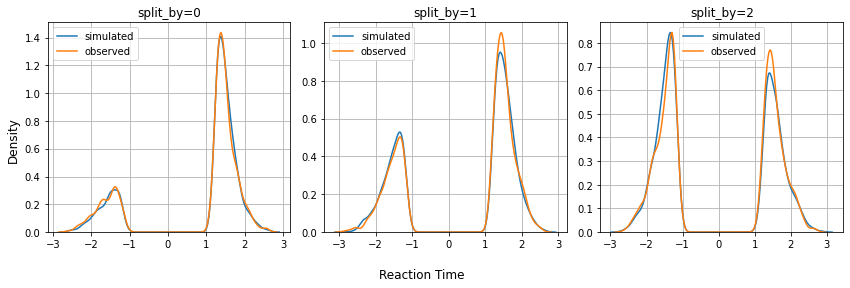

In [9]:
_ = hddm.plotting.plot_ppc_rt_rlssm(data, ppc_sdata, 40, 0.06)